In [1]:
# Download dataset

# NOTE: this url may be temporary, the current long term storage is on Kaggle: https://www.kaggle.com/datasets/pelmers/github-repository-metadata-with-5-stars
DATA_URL = 'https://file2.pelmers.com/repo_metadata.json'
DATA_PATH = 'repo_metadata.json'

import os, sys, subprocess

# Define function x that given a command string, runs it with subprocess and streams the output
def x(cmd):
    p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    buf = getattr(sys.stdout, 'buffer', sys.stdout)
    for c in iter(lambda: p.stdout.read(1), b""):
        # of course this won't work if the byte is not printable but we'll ignore that for now
        buf.write(c.decode('utf-8', 'ignore'))
    retval = p.wait()
    return retval

if not os.path.exists(DATA_PATH):
    print('Downloading dataset...')
    x(f'curl -O {DATA_URL}')
    print(f'Datset downloaded to {DATA_PATH}')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1789M  100 1789M    0     0   234M      0  0:00:07  0:00:07 --:--:--  273M
Datset downloaded to repo_metadata.json


In [2]:
# Import data with pandas

import pandas as pd

compression = None if DATA_PATH.endswith('.json') else 'infer'
df = pd.read_json(DATA_PATH, compression=compression)

print("Data loaded from {}.".format(DATA_PATH))

Data loaded from repo_metadata.json.


In [3]:
# Print data column names, number of rows, and example row

print(f"Data columns: {df.columns}")
print(f"Number of rows: {len(df)}")
print(f"First row:\n{df.head(1)}")

Data columns: Index(['owner', 'name', 'stars', 'forks', 'watchers', 'isFork', 'isArchived',
       'languages', 'diskUsageKb', 'pullRequests', 'description',
       'primaryLanguage', 'createdAt', 'pushedAt', 'defaultBranchCommitCount',
       'license', 'assignableUserCount', 'codeOfConduct', 'forkingAllowed',
       'nameWithOwner', 'parent'],
      dtype='object')
Number of rows: 2917951
First row:
          owner          name   stars  forks  watchers  isFork  isArchived  \
0  freeCodeCamp  freeCodeCamp  359805  30814      8448   False       False   

                                           languages  diskUsageKb  \
0  [{'name': 'TypeScript', 'size': 1125180}, {'na...       377334   

   pullRequests  ... primaryLanguage             createdAt  \
0         31867  ...      TypeScript  2014-12-24T17:49:19Z   

               pushedAt defaultBranchCommitCount  \
0  2023-01-21T15:05:31Z                  32231.0   

                                   license assignableUserCount  codeO

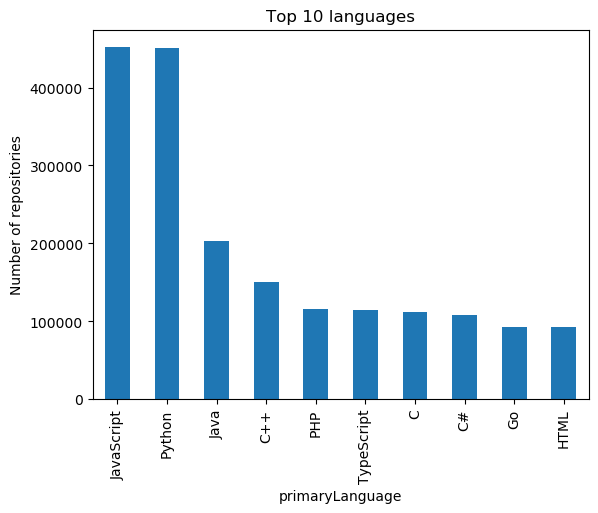

In [4]:
import matplotlib.pyplot as plt

# Group by 'primaryLanguage' and show a bar graph of the top 10 languages, make sure the bar chart has a title and axis labels
plt.title('Top 10 languages')
plt.ylabel('Number of repositories')
df.groupby('primaryLanguage').size().sort_values(ascending=False).head(10).plot.bar()

In [5]:
# Top 10 entries by defaultBranchCommitCount
df.sort_values(by='defaultBranchCommitCount', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,diskUsageKb,pullRequests,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
1529869,FormerlyChucks,IThinkImOKAY,17,9,0,False,False,"[{'name': 'Python', 'size': 4302}, {'name': 'C...",370600,37,...,Python,2020-10-06T19:36:33Z,2021-08-31T23:55:52Z,4314502.0,None,1,None,True,FormerlyChucks/IThinkImOKAY,NaN
654683,virejdasani,Commited,64,9,1,False,True,"[{'name': 'Python', 'size': 906}]",204626,0,...,Python,2021-02-12T14:26:07Z,2021-07-08T05:20:32Z,3000007.0,None,1,None,True,virejdasani/Commited,NaN
1824201,Helikopter-Bojowy,Exp-na-helikopterze,9,4,3,False,False,[],1897169,4,...,None,2021-03-27T12:38:30Z,2023-01-24T19:37:48Z,2031609.0,None,2,None,True,Helikopter-Bojowy/Exp-na-helikopterze,NaN
499551,proxylist-to,proxy-list,29,10,2,False,False,[],1164711,0,...,None,2022-09-10T20:11:11Z,2022-12-05T18:18:29Z,2030023.0,None,1,None,True,proxylist-to/proxy-list,NaN
444780,cirosantilli,test-many-commits-1m,77,27,5,False,False,[],288242,6,...,None,2016-05-18T10:03:28Z,2020-10-01T21:19:24Z,2000000.0,None,1,None,True,cirosantilli/test-many-commits-1m,NaN
945184,19h,heartbeat,16,35,3,False,False,[],4182405,0,...,None,2014-07-04T00:46:43Z,2022-04-24T01:16:42Z,1683892.0,None,1,None,True,19h/heartbeat,NaN
2015825,moiify,AutoGreen,12,9,3,False,False,"[{'name': 'Batchfile', 'size': 200}, {'name': ...",61418175,0,...,Batchfile,2019-01-08T02:38:23Z,2023-01-25T02:03:20Z,1485266.0,None,1,None,True,moiify/AutoGreen,NaN
104131,archlinux,svntogit-community,275,317,19,False,False,"[{'name': 'Shell', 'size': 27363446}, {'name':...",1880638,83,...,Shell,2020-07-21T20:43:02Z,2023-01-21T19:41:57Z,1387513.0,None,43,None,True,archlinux/svntogit-community,NaN
242441,openSUSE,kernel,151,78,24,False,False,"[{'name': 'C', 'size': 1180819704}, {'name': '...",3560529,4,...,C,2014-12-01T10:25:28Z,2023-01-21T15:24:51Z,1236686.0,Other,36,None,True,openSUSE/kernel,NaN
551790,SUSE,kernel,42,11,9,False,False,"[{'name': 'C', 'size': 1180819704}, {'name': '...",2934947,0,...,C,2020-01-31T17:02:02Z,2023-01-21T15:23:40Z,1236686.0,Other,18,None,True,SUSE/kernel,NaN


In [6]:
# Top 10 biggest repos by diskUsageKb
df.sort_values(by='diskUsageKb', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,diskUsageKb,pullRequests,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
54883,rozierguillaume,covid-19,308,35,20,False,False,"[{'name': 'HTML', 'size': 1381973907}, {'name'...",105078627,8,...,HTML,2020-03-15T13:25:00Z,2021-09-27T18:01:39Z,6000.0,MIT License,1,None,True,rozierguillaume/covid-19,NaN
1159887,TWLBot,Builds-archive,28,3,3,False,True,[],105052260,4,...,None,2019-02-03T23:00:26Z,2021-03-10T05:43:19Z,3619.0,None,2,None,True,TWLBot/Builds-archive,NaN
2034560,NagatoDEV,PlayStation-Home-Master-Archive,12,10,8,False,False,[],104992378,0,...,None,2020-11-18T11:37:11Z,2022-06-23T09:06:00Z,1471.0,None,7,None,True,NagatoDEV/PlayStation-Home-Master-Archive,NaN
429225,carranco-sga,Mexico-COVID-19,71,41,15,False,True,"[{'name': 'Julia', 'size': 22614}]",104987741,2,...,Julia,2020-03-15T23:52:12Z,2022-03-15T00:28:04Z,5657.0,MIT License,1,None,True,carranco-sga/Mexico-COVID-19,NaN
2037354,TWLBot,Builds-archive-2,12,0,3,False,True,[],104942975,3,...,None,2021-03-10T05:34:26Z,2022-03-13T04:49:16Z,1899.0,None,2,None,True,TWLBot/Builds-archive-2,NaN
47389,covid19india,api,668,624,44,False,True,"[{'name': 'Python', 'size': 93290}, {'name': '...",104880243,245,...,Python,2020-03-21T05:05:50Z,2021-09-09T07:25:38Z,3060.0,MIT License,16,None,True,covid19india/api,NaN
2732861,The-Unstable-World-backup,binary,5,0,1,False,True,[],104859064,1,...,None,2019-11-29T15:53:23Z,2020-03-08T14:45:27Z,8698.0,None,1,None,True,The-Unstable-World-backup/binary,NaN
393268,arendst,Tasmota-firmware,59,16,5,False,False,"[{'name': 'HTML', 'size': 16382}, {'name': 'Py...",103607386,2,...,HTML,2021-08-07T08:03:55Z,2023-01-21T15:02:30Z,2179.0,GNU General Public License v3.0,2,None,True,arendst/Tasmota-firmware,NaN
580493,lopezbec,COVID19_Tweets_Dataset,46,55,3,False,False,"[{'name': 'HTML', 'size': 30303829}, {'name': ...",102459084,0,...,HTML,2021-07-15T14:33:13Z,2023-01-13T13:27:47Z,1167.0,None,1,None,True,lopezbec/COVID19_Tweets_Dataset,NaN
1114733,PincongBot,qdaily,24,8,2,False,False,[],101741540,0,...,None,2020-10-01T04:00:47Z,2021-02-17T18:39:55Z,281.0,None,1,None,True,PincongBot/qdaily,NaN


In [7]:
# Top 10 by assignableUserCount
df.sort_values(by='assignableUserCount', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,diskUsageKb,pullRequests,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
2655474,mercadolibre,fury_mobile-ios-ui,5,2,38,False,False,"[{'name': 'Objective-C', 'size': 652768}, {'na...",1406,111,...,Objective-C,2018-03-15T19:27:37Z,2023-01-25T20:07:02Z,365.0,Other,10000,None,True,mercadolibre/fury_mobile-ios-ui,NaN
648149,microsoft,FourQlib,62,28,10,False,False,"[{'name': 'C', 'size': 1833291}, {'name': 'Ass...",1280,2,...,C,2017-05-08T22:59:45Z,2022-08-31T20:28:41Z,58.0,MIT License,9999,Other,True,microsoft/FourQlib,NaN
568224,microsoft,CRA,45,18,20,False,False,"[{'name': 'C#', 'size': 588241}]",485,28,...,C#,2017-05-05T23:55:22Z,2022-12-08T05:41:55Z,152.0,MIT License,9999,Other,True,microsoft/CRA,NaN
651664,microsoft,AppConsult-WinAppsModernizationWorkshop,63,34,20,False,False,"[{'name': 'C#', 'size': 1088729}, {'name': 'Sm...",43221,52,...,C#,2019-04-01T13:16:27Z,2022-12-08T09:03:36Z,209.0,MIT License,9999,Other,True,microsoft/AppConsult-WinAppsModernizationWorkshop,NaN
207551,microsoft,Learn-LTI,112,46,13,False,False,"[{'name': 'TypeScript', 'size': 283321}, {'nam...",20355,144,...,TypeScript,2020-06-22T17:50:30Z,2023-01-08T07:53:52Z,540.0,MIT License,9999,Other,True,microsoft/Learn-LTI,NaN
86966,microsoft,vscode-typescript-tslint-plugin,188,32,26,False,False,"[{'name': 'TypeScript', 'size': 15195}]",483,16,...,TypeScript,2018-10-19T21:16:08Z,2022-08-17T20:07:10Z,98.0,MIT License,9999,Other,True,microsoft/vscode-typescript-tslint-plugin,NaN
1999249,MicrosoftDocs,windows-topic-specific-samples,12,10,26,False,False,[],368,0,...,None,2017-03-22T20:03:35Z,2019-03-11T20:04:11Z,4.0,MIT License,9999,Other,True,MicrosoftDocs/windows-topic-specific-samples,NaN
389389,microsoft,planetary-computer-apis,57,19,11,False,False,"[{'name': 'Python', 'size': 321498}, {'name': ...",10876,132,...,Python,2021-08-19T17:08:44Z,2023-01-21T21:15:30Z,128.0,MIT License,9999,Other,True,microsoft/planetary-computer-apis,NaN
1034959,microsoft,powerbi-visuals-utils-dataviewutils,21,25,17,False,False,"[{'name': 'TypeScript', 'size': 94734}, {'name...",554,64,...,TypeScript,2016-11-10T09:07:07Z,2023-01-09T10:25:21Z,51.0,Other,9999,Other,True,microsoft/powerbi-visuals-utils-dataviewutils,NaN
2862324,microsoft,workshop-aml-pytorch,5,1,11,False,False,"[{'name': 'Python', 'size': 8053}]",39,0,...,Python,2022-06-20T19:13:40Z,2022-10-28T08:18:28Z,13.0,MIT License,9999,Other,True,microsoft/workshop-aml-pytorch,NaN


In [8]:
# Total diskUsageKb of all repos in terabytes?
print(f"Total disk usage of all repos: {df['diskUsageKb'].sum() / 1024 / 1024 / 1024} TB")

Total disk usage of all repos: 69.28705850895494 TB


In [9]:
# Top 10 number of commits
df.sort_values(by='defaultBranchCommitCount', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,diskUsageKb,pullRequests,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
1529869,FormerlyChucks,IThinkImOKAY,17,9,0,False,False,"[{'name': 'Python', 'size': 4302}, {'name': 'C...",370600,37,...,Python,2020-10-06T19:36:33Z,2021-08-31T23:55:52Z,4314502.0,None,1,None,True,FormerlyChucks/IThinkImOKAY,NaN
654683,virejdasani,Commited,64,9,1,False,True,"[{'name': 'Python', 'size': 906}]",204626,0,...,Python,2021-02-12T14:26:07Z,2021-07-08T05:20:32Z,3000007.0,None,1,None,True,virejdasani/Commited,NaN
1824201,Helikopter-Bojowy,Exp-na-helikopterze,9,4,3,False,False,[],1897169,4,...,None,2021-03-27T12:38:30Z,2023-01-24T19:37:48Z,2031609.0,None,2,None,True,Helikopter-Bojowy/Exp-na-helikopterze,NaN
499551,proxylist-to,proxy-list,29,10,2,False,False,[],1164711,0,...,None,2022-09-10T20:11:11Z,2022-12-05T18:18:29Z,2030023.0,None,1,None,True,proxylist-to/proxy-list,NaN
444780,cirosantilli,test-many-commits-1m,77,27,5,False,False,[],288242,6,...,None,2016-05-18T10:03:28Z,2020-10-01T21:19:24Z,2000000.0,None,1,None,True,cirosantilli/test-many-commits-1m,NaN
945184,19h,heartbeat,16,35,3,False,False,[],4182405,0,...,None,2014-07-04T00:46:43Z,2022-04-24T01:16:42Z,1683892.0,None,1,None,True,19h/heartbeat,NaN
2015825,moiify,AutoGreen,12,9,3,False,False,"[{'name': 'Batchfile', 'size': 200}, {'name': ...",61418175,0,...,Batchfile,2019-01-08T02:38:23Z,2023-01-25T02:03:20Z,1485266.0,None,1,None,True,moiify/AutoGreen,NaN
104131,archlinux,svntogit-community,275,317,19,False,False,"[{'name': 'Shell', 'size': 27363446}, {'name':...",1880638,83,...,Shell,2020-07-21T20:43:02Z,2023-01-21T19:41:57Z,1387513.0,None,43,None,True,archlinux/svntogit-community,NaN
242441,openSUSE,kernel,151,78,24,False,False,"[{'name': 'C', 'size': 1180819704}, {'name': '...",3560529,4,...,C,2014-12-01T10:25:28Z,2023-01-21T15:24:51Z,1236686.0,Other,36,None,True,openSUSE/kernel,NaN
551790,SUSE,kernel,42,11,9,False,False,"[{'name': 'C', 'size': 1180819704}, {'name': '...",2934947,0,...,C,2020-01-31T17:02:02Z,2023-01-21T15:23:40Z,1236686.0,Other,18,None,True,SUSE/kernel,NaN


In [10]:
from tqdm import tqdm

language = 'Java'
lang_df = df[(df['license'] == 'MIT License') & (df['pullRequests'] >= 20) & (df['primaryLanguage'] == language) &
             (df['pushedAt'] > '2022-01-01') & (df['assignableUserCount'] >= 5) & (df['defaultBranchCommitCount'] >= 100) ]

df_indices = []
for index, row in tqdm(lang_df.iterrows(), total=len(lang_df)):
    for lang in row['languages']:
        if lang['name'] == language and lang['size'] >= 100000:
            df_indices.append((lang['size'], index))
            break

lang_df = lang_df.loc[[index for size, index in df_indices]]
print(f"Number of {language} repos with MIT license, 20+ pull requests, pushed in the last year, 5+ assignable users, 100+ commits and >= 100kb of {language} code: {len(lang_df)}")

# print top 10 sorted by watchers count
lang_df.sort_values(by='watchers', ascending=False).head(10)

100%|██████████| 1333/1333 [00:00<00:00, 21084.54it/s]

Number of Java repos with MIT license, 20+ pull requests, pushed in the last year, 5+ assignable users, 100+ commits and >= 100kb of Java code: 1063


,owner,name,stars,forks,watchers,isFork,isArchived,languages,diskUsageKb,pullRequests,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
58229,uber,phabricator-jenkins-plugin,366,99,2575,False,False,"[{'name': 'Java', 'size': 369057}, {'name': 'H...",2536,216,...,Java,2015-04-07T20:50:58Z,2023-01-05T17:43:37Z,481.0,MIT License,7505,Contributor Covenant,True,uber/phabricator-jenkins-plugin,NaN
220801,uber,tchannel-java,134,64,2559,False,False,"[{'name': 'Java', 'size': 736969}, {'name': 'T...",1314,166,...,Java,2015-07-27T08:49:33Z,2022-05-20T20:53:28Z,651.0,MIT License,7505,Contributor Covenant,True,uber/tchannel-java,NaN
649,facebook,fresco,16898,3778,872,False,False,"[{'name': 'Java', 'size': 3187950}, {'name': '...",74999,410,...,Java,2015-03-02T09:58:04Z,2023-01-19T13:43:31Z,3436.0,MIT License,1647,Contributor Covenant,True,facebook/fresco,NaN
339,jenkinsci,jenkins,20176,7844,868,False,False,"[{'name': 'Java', 'size': 11642237}, {'name': ...",150330,7558,...,Java,2010-11-22T21:21:23Z,2023-01-21T01:02:06Z,33312.0,MIT License,2447,Other,True,jenkinsci/jenkins,NaN
3118,redis,jedis,10879,3717,696,False,False,"[{'name': 'Java', 'size': 3395292}, {'name': '...",12059,1527,...,Java,2010-06-11T13:04:43Z,2023-01-19T14:01:56Z,2114.0,MIT License,19,None,True,redis/jedis,NaN
98,CymChad,BaseRecyclerViewAdapterHelper,23353,4990,573,False,False,"[{'name': 'Java', 'size': 196381}, {'name': 'K...",65329,280,...,Java,2016-04-10T07:40:11Z,2022-10-21T08:35:55Z,1235.0,MIT License,6,None,True,CymChad/BaseRecyclerViewAdapterHelper,NaN
157318,Shopify,mobile-buy-sdk-android,195,130,436,False,False,"[{'name': 'Java', 'size': 1856337}, {'name': '...",3638,279,...,Java,2015-09-28T17:19:37Z,2023-01-11T16:06:32Z,553.0,MIT License,9205,Contributor Covenant,True,Shopify/mobile-buy-sdk-android,NaN
1408,mockito,mockito,13621,2345,423,False,False,"[{'name': 'Java', 'size': 3336779}, {'name': '...",48215,1435,...,Java,2012-10-13T20:27:12Z,2023-01-19T08:41:28Z,5869.0,MIT License,6,None,True,mockito/mockito,NaN
1634,facebook,stetho,12614,1155,381,False,False,"[{'name': 'Java', 'size': 823316}, {'name': 'J...",2353,321,...,Java,2015-01-22T22:34:10Z,2022-04-20T16:47:36Z,588.0,MIT License,1647,Other,True,facebook/stetho,NaN
5890,TooTallNate,Java-WebSocket,9542,2492,375,False,False,"[{'name': 'Java', 'size': 919060}, {'name': 'H...",4061,359,...,Java,2010-01-20T23:33:04Z,2023-01-14T06:18:12Z,1117.0,MIT License,7,None,True,TooTallNate/Java-WebSocket,NaN


In [11]:
# Updated h-index scores: https://danvdk.medium.com/github-stars-and-the-h-index-a-journey-c104cfe37da6

from collections import defaultdict

# Group df by 'owner' and aggregate a list of star counts for each author's repositories using pandas
star_counts_by_author = df.groupby('owner').agg({'stars': lambda x: list(x)})['stars'].to_dict()


# print the top 10 authors by total star count
top_authors = sorted(star_counts_by_author.items(), key=lambda x: sum(x[1]), reverse=True)[:10]
print("Top 10 authors by total star count:")
for author, star_counts in top_authors:
    print(f"{author}: {sum(star_counts)}")

# compute the h-index for each author
# h-index of an author is the maximum number h of repositories with at least h stars each
h_index_by_author = {
    author: max([
        h if len([stars for stars in star_counts if stars >= h]) >= h else 0
        for h in range(1, len(star_counts) + 1)
    ])
    for author, star_counts in tqdm(star_counts_by_author.items())
}

# print the top 10 h-index scores, one on each line
print("Top 10 authors by h-index:")
for author, h_index in sorted(h_index_by_author.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{author}: {h_index}")

Top 10 authors by total star count:
microsoft: 1706440
google: 1129982
facebook: 827793
apache: 608652
sindresorhus: 583425
alibaba: 575247
vuejs: 485651
freeCodeCamp: 409433
tensorflow: 402599
github: 381822


100%|██████████| 1079220/1079220 [00:06<00:00, 176747.86it/s]


Top 10 authors by h-index:
microsoft: 411
google: 359
apache: 231
sindresorhus: 228
facebookresearch: 208
Azure: 173
spatie: 171
alibaba: 164
PacktPublishing: 159
googlearchive: 149


In [12]:
# What is my h-index?
h_index_by_author['pelmers']

5